## CHEM286 HW3 Workbook - robert ramji

### Problem 1

In [20]:
from math import pi, sqrt

def interaction_eng(D):
    r = 10
    return -332/(D*r)

In [8]:
dielectrics = [1, 1.9, 35.85, 80]

engs = [interaction_eng(D) for D in dielectrics]

engs

[-33.2, -17.473684210526315, -0.9260808926080892, -0.415]

### Problem 2

In [34]:
O = (0,0,0,-0.834)
H1 = (0.96,0,0,0.417)
H2 = (-0.2903,0.647,0.647,0.417)
h2o = [O, H1, H2]

mu = [0,0,0]
for atom in h2o:
    for j in range(len(mu)):
        mu[j] += (atom[j] * atom[3])

mu

[0.2792648999999999, 0.269799, 0.269799]

In [36]:
sqrt(mu[0]**2 + mu[1]**2 + mu[2]**2)/0.208

2.2732398437787107

In [42]:
def get_dipole(molecule):
    mu = [0, 0, 0]
    for atom in molecule:
        for j in range(len(mu)):
            mu[j] += (atom[j] * atom[3])
            
    return sqrt(mu[0]**2 + mu[1]**2 + mu[2]**2)/0.208

In [43]:
C = (0, 0, 0, 0.04)
O = (1.428, 0, 0, -0.068)
H1 = (1.7183, -0.2368, 0.8839, 0.4)
H2 = (-0.3633, 0.7267, 0.7267, 0.08)
H3 = (-0.3633, -0.9926, 0.2660, 0.08)
H4 = (-0.3633, 0.2660, -0.9926, 0.08)
methanol = [C, O, H1, H2, H3, H4]

get_dipole(methanol)

2.9908863593418333

In [39]:
[0]*len(methanol)

[0, 0, 0, 0, 0, 0]

In [44]:
C = (0, 0, 0, -0.24)
C1 = (1.428, 0, 0, -0.24)
H11 = (1.7913, -0.2660, 0.9927, 0.08)
H12 = (1.7913, 0.9926, -0.2660, 0.0800)
H13 = (1.7913, -0.7267, -0.7267, 0.0800)
H2 = (-0.3633, 0.7267, 0.7267, 0.0800) 
H3 = (-0.3633, -0.9926, 0.2660, 0.0800) 
H4 = (-0.3633, 0.2660, -0.9926, 0.0800)
ethane = [C, C1, H11, H12, H13, H2, H3, H4]

get_dipole(ethane)

3.8461538461510206e-05

### Problem 5 - Extra Credit

In [110]:
import pandas as pd
import numpy as np
df = pd.read_excel("/home/robert/D/ESPFit.xlsx")

In [53]:
df.columns #yikes

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [71]:
# clean up the data based on excel sheet + visual inspection
RESP = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], axis =1)
RESP = RESP.drop([0,1,2])
RESP.columns = ["x", "y", "z", "Reference Potential"]
RESP.head()

,x,y,z,Reference Potential
3,-5.174,4.361,1.413,4.396314
4,-4.189,-5.449,0.823,4.410081
5,-2.154,2.562,5.039,3.351862
6,0.852,-3.391,0.279,-4.335746
7,-4.054,1.295,0.131,16.053091


In [72]:
# manually enter atom data
atom1 = (-0.797, -0.023, -0.035, 0)
atom2 = (0.731, 0.013, -0.049, 0)
atoms = [atom1, atom2]

In [74]:
# get scalar distance from position vectors
def distance(atom, point):
    return sqrt((atom[0]-point[0])**2 + (atom[1]-point[1])**2 + (atom[2]-point[2])**2)

In [94]:
# attempting to avoid for-loops and perform more
# efficient column-wise operations for getting distances

a1_xs = RESP["x"].apply(lambda x: (atom1[0]-x)**2)
a1_ys = RESP["y"].apply(lambda y: (atom1[1]-y)**2)
a1_zs = RESP["z"].apply(lambda z: (atom1[2]-z)**2)

a1_dist = a1_xs + a1_ys + a1_zs
a1_dist = a1_dist.apply(lambda x: sqrt(x))

a2_xs = RESP["x"].apply(lambda x: (atom2[0]-x)**2)
a2_ys = RESP["y"].apply(lambda y: (atom2[1]-y)**2)
a2_zs = RESP["z"].apply(lambda z: (atom2[2]-z)**2)

a2_dist = a2_xs + a2_ys + a2_zs
a2_dist = a2_dist.apply(lambda x: sqrt(x))

ref = RESP["Reference Potential"]

In [126]:
# Calculate the sum squared error for a given atomic charge q.
# Although there are two atoms, the molecule is neutral so 
# atom charges must therefore be equal and opposite

# Note to Prof. Gilson: If my numbers were wrong, it probably came from this function or mishandling of units
def get_err(q):
    err = 0
    for a in np.arange(3,61):
        err += (332*q*((1/a1_dist[a])-(1/a2_dist[a]))-ref[a])**2

    return err

In [124]:
from matplotlib import pyplot as plt
q = np.linspace(0,1,200)

In [127]:
errs = [get_err(i) for i in q]

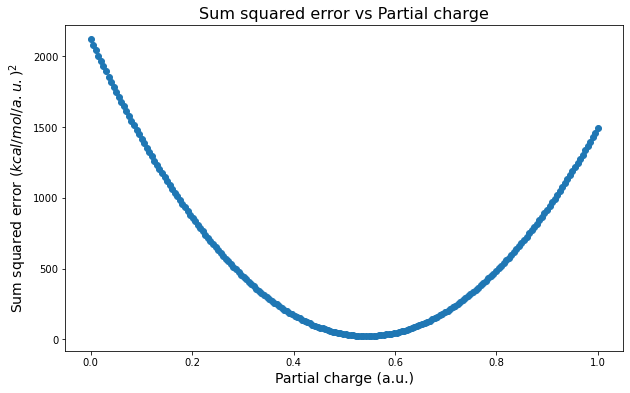

In [150]:
plt.figure(figsize=(10,6))
plt.scatter(q,errs)
plt.title("Sum squared error vs Partial charge", fontsize=16)
plt.xlabel("Partial charge (a.u.)", fontsize=14)
plt.ylabel("Sum squared error $(kcal/mol/a.u.)^{2}$", fontsize=14)
plt.show()

In [145]:
# get the pair of points with minimum SSE
df2 = pd.DataFrame([q,errs]).T
df2[df2[1].idxmin():109]

,0,1
108,0.542714,24.364686


Minimum SSE is achieved at +/- 0.542714 a.u. on atom 1 and the opposite charge on atom 2.